## Modern Portfolio Theory
**Modern Portfolio Theory (MPT)** suggests a way for investors to construct a diverse portfolio of investments optimized by the expected annual returns and market volatility. MPT was developed by the American economist and Nobel Prize winner in Economics, Harry Markowitz in 1952 and is still being used and studied by some investors today.

#### Intuition
* Given a set of assets and their closing prices through an extended time period, MPT constructs an **efficient frontier** of optimal portfolios of weightings maximized by expected annual returns for some given level of risk. To construct this frontier, we simulate 1000s of different combinations of portfolio weightings. The idea is that any portfolio along this efficient frontier is said to be fully optimized given a level of risk. The goal is to calculate and maximize the **Sharpe Ratio** (developed by another Nobel Prize winner William Sharpe) that describing the risk/reward ratio of assets. 

#### Efficient Frontier
<img src="efficient_frontier.png" width="750px">

#### Assumptions
* Investors are rational and risk-averse meaning they try to maximize return while minimizing risk
* Investors have the same access to the information on the investment returns and risk
* The markets are efficient, being able to correct any new information quickly
* Fees, commissions, and taxes are not added as constraints to the model

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [2]:
def get_df(tickers, start, end):
    '''
    Generate a pandas DataFrame of stock tickers and their price
    '''
    main_df = pd.DataFrame()

    for ticker in tickers:
        df = web.DataReader(ticker, 'yahoo', start, end)
        df.rename(columns={
            'Adj Close':f'{ticker}_close'
        }, inplace=True)

        df = df[[f'{ticker}_close',
                 ]]

        if len(main_df) == 0:
            main_df = df
            
        else:
            main_df = main_df.join(df)
            
    return main_df

In [56]:
def get_sharpe(df, num_portfolios=25000):
    '''
    Calculates annualized returns, volatility, and sharpe ratio
    '''
    #Calculate log returns given 250 trading days in a year
    daily_returns = np.log(df/df.shift(1))
    annual_returns = daily_returns.mean() * 250
    cov_daily = daily_returns.cov()
    cov_annual = cov_daily * 250

    #Initialize returns, volatility, weights
    portfolio_returns = []
    portfolio_volatility = []
    stock_weights = []

    #Generate annualized returns and volatility from different combinations of weights
    for single_portfolio in range(num_portfolios):
        weights = np.random.random(len(tickers))
        weights /= np.sum(weights)
        
        returns = np.dot(weights, annual_returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
        
        portfolio_returns.append(returns)
        portfolio_volatility.append(volatility)
        stock_weights.append(weights)

    portfolio = {'Annualized Returns': portfolio_returns,
                 'Annualized Volatility': portfolio_volatility}

    for counter,symbol in enumerate(tickers):
        portfolio[symbol+'_weight'] = [weight[counter] for weight in stock_weights]
        
    #Push into pandas dataframe
    df = pd.DataFrame(portfolio)
    
    #Calculate Sharpe Ratio
    df['Sharpe Ratio'] = df['Annualized Returns'] / df['Annualized Volatility']

    df = df[['Annualized Returns', 'Annualized Volatility', 'Sharpe Ratio'] + [ticker+'_weight' for ticker in tickers]]

    return df

### Construct Portfolio
* Specify tickers

In [92]:
tickers = ['AAPL','SOXL','ETH-USD','JPM','TSLA','QQQ']

start = '2010-01-01'
end = pd.to_datetime('today')

data = get_df(tickers, start, end)
data.tail()

df = get_sharpe(data, num_portfolios=10000)

### Sort by Annualized Returns

In [93]:
df.sort_values('Annualized Returns', ascending=False).head(5)

,Annualized Returns,Annualized Volatility,Sharpe Ratio,AAPL_weight,SOXL_weight,ETH-USD_weight,JPM_weight,TSLA_weight,QQQ_weight
3009,0.736255,0.786361,0.936281,0.002697,0.122263,0.560296,0.032910,0.250516,0.031319
2176,0.705504,0.785701,0.897928,0.066370,0.275723,0.543177,0.029728,0.077655,0.007347
9458,0.697368,0.789122,0.883727,0.015569,0.212727,0.557496,0.075122,0.071138,0.067948
7058,0.690816,0.776102,0.890110,0.205409,0.030347,0.568424,0.089670,0.072932,0.033218
8163,0.687734,0.664224,1.035394,0.043041,0.041105,0.451017,0.008003,0.430590,0.026245


### Sort by Sharpe Ratio

In [94]:
df.sort_values('Sharpe Ratio', ascending=False).head()

,Annualized Returns,Annualized Volatility,Sharpe Ratio,AAPL_weight,SOXL_weight,ETH-USD_weight,JPM_weight,TSLA_weight,QQQ_weight
2181,0.382924,0.299464,1.278700,0.289109,0.010823,0.119210,0.048932,0.276650,0.255275
6505,0.421964,0.330178,1.277987,0.339954,0.000651,0.168738,0.029259,0.256123,0.205275
5832,0.417829,0.327201,1.276982,0.431353,0.015066,0.163917,0.026575,0.218112,0.144978
527,0.371469,0.291108,1.276049,0.493250,0.016678,0.093895,0.081961,0.250794,0.063422
5770,0.462288,0.363328,1.272371,0.492430,0.004070,0.193133,0.018539,0.275742,0.016086


### Sort By Annualized Volatility
* High risk, high reward

In [95]:
df.sort_values('Annualized Volatility', ascending=False).head()

,Annualized Returns,Annualized Volatility,Sharpe Ratio,AAPL_weight,SOXL_weight,ETH-USD_weight,JPM_weight,TSLA_weight,QQQ_weight
9458,0.697368,0.789122,0.883727,0.015569,0.212727,0.557496,0.075122,0.071138,0.067948
3009,0.736255,0.786361,0.936281,0.002697,0.122263,0.560296,0.032910,0.250516,0.031319
2176,0.705504,0.785701,0.897928,0.066370,0.275723,0.543177,0.029728,0.077655,0.007347
7058,0.690816,0.776102,0.890110,0.205409,0.030347,0.568424,0.089670,0.072932,0.033218
710,0.668488,0.775999,0.861454,0.128961,0.065914,0.565921,0.148757,0.015744,0.074703


### Sort By Annualized Returns

In [96]:
df.sort_values('Annualized Returns', ascending=False).head()

,Annualized Returns,Annualized Volatility,Sharpe Ratio,AAPL_weight,SOXL_weight,ETH-USD_weight,JPM_weight,TSLA_weight,QQQ_weight
3009,0.736255,0.786361,0.936281,0.002697,0.122263,0.560296,0.032910,0.250516,0.031319
2176,0.705504,0.785701,0.897928,0.066370,0.275723,0.543177,0.029728,0.077655,0.007347
9458,0.697368,0.789122,0.883727,0.015569,0.212727,0.557496,0.075122,0.071138,0.067948
7058,0.690816,0.776102,0.890110,0.205409,0.030347,0.568424,0.089670,0.072932,0.033218
8163,0.687734,0.664224,1.035394,0.043041,0.041105,0.451017,0.008003,0.430590,0.026245


### Plot Efficient Frontier

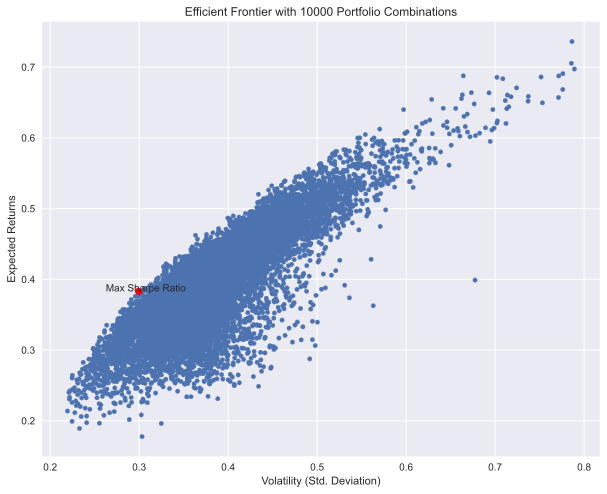

In [98]:
# plot the efficient frontier with a scatter plot
plt.style.use('seaborn')
df.plot.scatter(x='Annualized Volatility', y='Annualized Returns', figsize=(10, 8), grid=True)
plt.scatter(df.loc[df['Sharpe Ratio'].argmax()][1], df.loc[df['Sharpe Ratio'].argmax()][0], c='red', s=50)
plt.annotate("Max Sharpe Ratio", (df.loc[df['Sharpe Ratio'].argmax()][1] - 0.037, df.loc[df['Sharpe Ratio'].argmax()][0]), )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title(f'Efficient Frontier with {len(df)} Portfolio Combinations')
plt.show()

### Portfolio Maximizing Sharpe Ratio

In [113]:
df.loc[df['Sharpe Ratio'].argmax()][3:].sort_values(ascending=False)

AAPL_weight       0.289109
TSLA_weight       0.276650
QQQ_weight        0.255275
ETH-USD_weight    0.119210
JPM_weight        0.048932
SOXL_weight       0.010823
Name: 2181, dtype: float64